# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We chose Rotterdam and Lond...
1,✅ Trip Verified | The entire booking and ticke...
2,Not Verified | British Airways cancelled my ...
3,Not Verified | I wanted to write this review s...
4,✅ Trip Verified | Check in fast and friendly....


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Preprocessing

---

## 1. Cleaning the text reviews

In [5]:
mydata = pd.read_csv("data/BA_reviews.csv")

In [6]:
mydata

,Unnamed: 0,reviews
0,0,✅ Trip Verified | We chose Rotterdam and Lond...
1,1,✅ Trip Verified | The entire booking and ticke...
2,2,Not Verified | British Airways cancelled my ...
3,3,Not Verified | I wanted to write this review s...
4,4,✅ Trip Verified | Check in fast and friendly....
...,...,...
995,995,✅ Trip Verified | London to Seattle. My seat ...
996,996,✅ Trip Verified | London to Gibraltar. Check ...
997,997,✅ Trip Verified | London to Boston. BA replac...
998,998,✅ Trip Verified | London to Doha. Similar to ...


In [7]:
mydata.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
mydata['reviews'][0]

'✅ Trip Verified |  We chose Rotterdam and London City airport because of convenience, both small and having a hotel in the Docklands meant a short distance from City Airport. Three hours before our departure our flight was canceled however. Disappointing, but we made a swift move to Amsterdam Schiphol Airport, but unfortunately we were offered a flight to Heathrow, which meant almost 1,5 hours by tube to our hotel. Flight back operated out of LCY to RTM, but had a 30 mins delay, so in terms of punctuality BA is not very reliant. The flights were okay, with a snack and a drink. The E190 being far more comfortable with 2-2 seating and more legroom than the A319. Our extra expenses for the cancelled flight were handled promptly and we got all the money for extra transport and food back, so BA did a good job in this respect. But hesitant to book again, though they are the only airline flying between RTM and LCY.'

In [9]:
mydata['reviews'][3]

"Not Verified | I wanted to write this review so I could give a huge thank you to one of the staff on Lisbon named Jay Ramphul. She went above and beyond and really helped me in an urgent situation. I had boarded my flight with 20 minutes before take off when I realized I had left my cell phone in the club lounge. I was not going to get permission to deboard and get back on in time for take off. Jay stepped in and made it happened. She literally ran with me a far distance to retrieve my phone with me and get me back on the plane within minutes of take off. This is true service! I don't know if this review will ever get back to her or her management, but I hope it does. I want to again express my gratitude for her help and kindness in this matter."

The text "✅ Trip Verified" and "Not Verified" can be removed from each row as it's not relevant to what we want to investigate; we only need to analyse the reviews themselves. This text is followed by the delimiter '|', so we can split the text and only keep the part after the delimiter.

In [10]:
mydata['reviews'] = mydata['reviews'].str.split('|').str[1].str.strip()

In [11]:
mydata

,reviews
0,We chose Rotterdam and London City airport bec...
1,The entire booking and ticketing experience ha...
2,British Airways cancelled my flight less than ...
3,I wanted to write this review so I could give ...
4,Check in fast and friendly. Security a breeze....
...,...
995,London to Seattle. My seat was on the upper de...
996,"London to Gibraltar. Check in at T3 was fine, ..."
997,London to Boston. BA replaced A380 with a very...
998,London to Doha. Similar to our outbound flight...


Since we are dealing with text data, it is important to first clean it appropriately for analysis. We can use packages in Python's Natural Language Processing Toolkit (NLTK) for the same.

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rheam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rheam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rheam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rheam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Function to convert all the text to lowercase for consistency

In [15]:
def mylowercase(text):
    return text.lower()

### Function to tokenize the text

In [16]:
def mytokenize(text):
    return word_tokenize(text)

### Function to remove all stopwords and punctuations

In [17]:
import string
def mystopwords_punctuations(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

### Function to lemmatize all the tokens (i.e. reduce a word to its root form)

In [18]:
def mylemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

### Cleaning the text

In [19]:
def preprocess_text(text):
    text = mylowercase(text)
    tokens = mytokenize(text)
    tokens = mystopwords_punctuations(tokens)
    tokens = mylemmatize(tokens)
    cleaned_text = ' '.join(tokens)
    return cleaned_text

mydata['cleaned_text'] = mydata['reviews'].apply(preprocess_text)

In [20]:
mydata.head(5)

,reviews,cleaned_text
0,We chose Rotterdam and London City airport bec...,chose rotterdam london city airport convenienc...
1,The entire booking and ticketing experience ha...,entire booking ticketing experience stressful ...
2,British Airways cancelled my flight less than ...,british airway cancelled flight le 24 hour aut...
3,I wanted to write this review so I could give ...,wanted write review could give huge thank one ...
4,Check in fast and friendly. Security a breeze....,check fast friendly security breeze lounge bus...


The cleaned_text column contains reviews which are more structured and provide a standardized representation of the textual data. This column contains text which is now more suitable for various natural language processing (NLP) tasks, such as sentiment analysis and topic modeling, which we will perform now.

## 2. Sentiment Analysis using the RoBERTa model

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
def roberta(example):
  et=tokenizer(example, return_tensors="pt")
  output=model(**et)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={"roberta_neg":scores[0],
                "roberta_neu":scores[1],
                "roberta_pos":scores[2]}
  return scores_dict

In [25]:
from tqdm import tqdm
mydata['roberta_scores'] = None

In [27]:
for i, row in tqdm(mydata.iterrows(), total=len(mydata)):
    mydata.at[i, 'roberta_scores'] = roberta(row['cleaned_text'])

100%|██████████| 1000/1000 [08:33<00:00,  1.95it/s]


In [28]:
mydata

,reviews,cleaned_text,roberta_scores
0,We chose Rotterdam and London City airport bec...,chose rotterdam london city airport convenienc...,"{'roberta_neg': 0.2127992, 'roberta_neu': 0.50..."
1,The entire booking and ticketing experience ha...,entire booking ticketing experience stressful ...,"{'roberta_neg': 0.75623345, 'roberta_neu': 0.2..."
2,British Airways cancelled my flight less than ...,british airway cancelled flight le 24 hour aut...,"{'roberta_neg': 0.6923269, 'roberta_neu': 0.27..."
3,I wanted to write this review so I could give ...,wanted write review could give huge thank one ...,"{'roberta_neg': 0.014078521, 'roberta_neu': 0...."
4,Check in fast and friendly. Security a breeze....,check fast friendly security breeze lounge bus...,"{'roberta_neg': 0.010793291, 'roberta_neu': 0...."
...,...,...,...
995,London to Seattle. My seat was on the upper de...,london seattle seat upper deck nice perk seatt...,"{'roberta_neg': 0.047677286, 'roberta_neu': 0...."
996,"London to Gibraltar. Check in at T3 was fine, ...",london gibraltar check t3 fine lounge good sta...,"{'roberta_neg': 0.003835419, 'roberta_neu': 0...."
997,London to Boston. BA replaced A380 with a very...,london boston ba replaced a380 old boeing 747....,"{'roberta_neg': 0.06010001, 'roberta_neu': 0.3..."
998,London to Doha. Similar to our outbound flight...,london doha similar outbound flight seat comfo...,"{'roberta_neg': 0.2700779, 'roberta_neu': 0.53..."


In [29]:
#Classifying the sentiment of the review based on RoBERTa scores
def classify_sentiment(scores):
    if scores['roberta_pos'] > scores['roberta_neg'] and scores['roberta_pos'] > scores['roberta_neu']:
        return 'Positive'
    elif scores['roberta_neg'] > scores['roberta_pos'] and scores['roberta_neg'] > scores['roberta_neu']:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
mydata['sentiment_class'] = mydata['roberta_scores'].apply(classify_sentiment)

In [31]:
mydata

,reviews,cleaned_text,roberta_scores,sentiment_class
0,We chose Rotterdam and London City airport bec...,chose rotterdam london city airport convenienc...,"{'roberta_neg': 0.2127992, 'roberta_neu': 0.50...",Neutral
1,The entire booking and ticketing experience ha...,entire booking ticketing experience stressful ...,"{'roberta_neg': 0.75623345, 'roberta_neu': 0.2...",Negative
2,British Airways cancelled my flight less than ...,british airway cancelled flight le 24 hour aut...,"{'roberta_neg': 0.6923269, 'roberta_neu': 0.27...",Negative
3,I wanted to write this review so I could give ...,wanted write review could give huge thank one ...,"{'roberta_neg': 0.014078521, 'roberta_neu': 0....",Positive
4,Check in fast and friendly. Security a breeze....,check fast friendly security breeze lounge bus...,"{'roberta_neg': 0.010793291, 'roberta_neu': 0....",Positive
...,...,...,...,...
995,London to Seattle. My seat was on the upper de...,london seattle seat upper deck nice perk seatt...,"{'roberta_neg': 0.047677286, 'roberta_neu': 0....",Positive
996,"London to Gibraltar. Check in at T3 was fine, ...",london gibraltar check t3 fine lounge good sta...,"{'roberta_neg': 0.003835419, 'roberta_neu': 0....",Positive
997,London to Boston. BA replaced A380 with a very...,london boston ba replaced a380 old boeing 747....,"{'roberta_neg': 0.06010001, 'roberta_neu': 0.3...",Positive
998,London to Doha. Similar to our outbound flight...,london doha similar outbound flight seat comfo...,"{'roberta_neg': 0.2700779, 'roberta_neu': 0.53...",Neutral


Now we have the sentiment class for each review. Let us analyse further.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("viridis")

from wordcloud import WordCloud

### 2.1 Distribution of sentiment classes

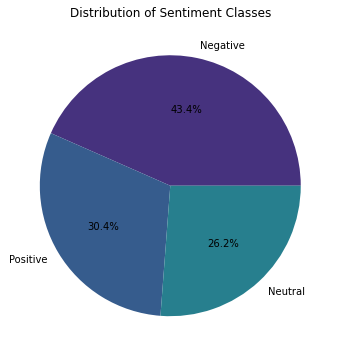

In [33]:
sentiment_counts = mydata['sentiment_class'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('Distribution of Sentiment Classes')
plt.show()

43.4% of the reviews are of a negative sentiment, and 30.4% are positive.

### 2.2 Word clouds

In [34]:
positive_data = mydata[mydata['sentiment_class'] == 'Positive']
negative_data = mydata[mydata['sentiment_class'] == 'Negative']
neutral_data = mydata[mydata['sentiment_class'] == 'Neutral']

In [35]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

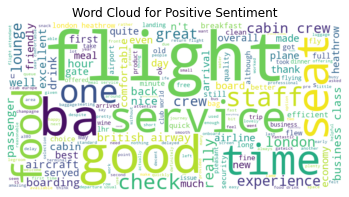

In [36]:
# Positive Sentiment Word Cloud
plt.figure() 
plt.title('Word Cloud for Positive Sentiment')
generate_wordcloud(positive_data['cleaned_text'])
plt.show()

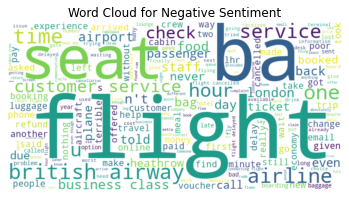

In [37]:
# Negative Sentiment Word Cloud
plt.title('Word Cloud for Negative Sentiment')
generate_wordcloud(negative_data['cleaned_text'])
plt.show()

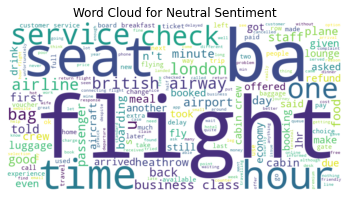

In [38]:
# Neutral Sentiment Word Cloud
plt.title('Word Cloud for Neutral Sentiment')
generate_wordcloud(neutral_data['cleaned_text'])
plt.show()

Of course, common words like "flight," "ba" (British Airways), "seat", "service," and "time" are expected to appear frequently because they are related to the topic of the reviews. This is expected. Frequent mentions of "service" indicates a focus on customer service experiences in all three classes of reviews; similarly, the mentions of "time" in all kinds of reviews suggests discussions about punctuality or timeliness by the customers.

## 3. Topic Modelling

Now, we will perform topic modeling using the Latent Dirichlet Allocation (LDA) model.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline

In [43]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_df=0.95, min_df=2, stop_words='english')), 
    ('lda_model', LatentDirichletAllocation(n_components=5, random_state=42)),  # We have chosen to distribute to 5 topics (n_components=5)
])

In [44]:
pipeline.fit(mydata['cleaned_text'])

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.95, min_df=2, stop_words='english')),
                ('lda_model',
                 LatentDirichletAllocation(n_components=5, random_state=42))])

In [45]:
topic_word_distributions = pipeline.named_steps['lda_model'].components_ #extracting topic-word distributions from the trained LDA model

In [46]:
# Get the feature names (words) from the vectorizer
vectorizer = pipeline.named_steps['vectorizer']
feature_names = vectorizer.get_feature_names_out()

In [47]:
#Displaying the top 10 words for each topic
n_top_words = 10
for topic_idx, topic in enumerate(topic_word_distributions):
    top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: flight, time, bag, check, ba, hour, london, staff, plane, service
Topic 2: flight, ba, customer, hour, service, british, airway, day, airline, london
Topic 3: seat, class, business, ba, check, economy, airline, airway, british, passenger
Topic 4: flight, ba, seat, service, good, food, crew, cabin, time, class
Topic 5: flight, minute, hour, staff, delayed, seat, london, ba, 30, airline


From the top 10 words of each topic, it doesn't seem explicitly apparent what each of these topics of reviews focuses on (i.e. topics can't explicitly be said to be about timeliness, service, food, etc. due to there being similar words present in each of the topics).

We can however, infer:
- Topic 1 (bag, check, london, staff, service) seems to be largely about experiences like boarding, check-in, baggage, etc.
- Topic 2 is a bit ambiguous due to many words being common across all topics.
- Topic 3 (seat, class, business, economy, passenger) seems to be largely about seating classes.
- Topic 4 (good, service, seat, food, crew, time) seems to be those reviews that talk about the in-flight experience.
- Topic 5 (minute, hour, delayed, 30) seems to largely be about the punctuality of the flight.

In [49]:
topic_distributions = pipeline.transform(mydata['cleaned_text'])

In [50]:
for i in range(topic_distributions.shape[1]):
    mydata[f'Topic_{i+1}_distribution'] = topic_distributions[:, i]

In [51]:
mydata.head(3)

,reviews,cleaned_text,roberta_scores,sentiment_class,Topic_1_distribution,Topic_2_distribution,Topic_3_distribution,Topic_4_distribution,Topic_5_distribution
0,We chose Rotterdam and London City airport bec...,chose rotterdam london city airport convenienc...,"{'roberta_neg': 0.2127992, 'roberta_neu': 0.50...",Neutral,0.002980,0.00299,0.002956,0.168768,0.822307
1,The entire booking and ticketing experience ha...,entire booking ticketing experience stressful ...,"{'roberta_neg': 0.75623345, 'roberta_neu': 0.2...",Negative,0.002756,0.90265,0.002773,0.089070,0.002750
2,British Airways cancelled my flight less than ...,british airway cancelled flight le 24 hour aut...,"{'roberta_neg': 0.6923269, 'roberta_neu': 0.27...",Negative,0.003923,0.87742,0.003891,0.003898,0.110868


Let us get the dominant topic for each review.

In [52]:
dominant_topics = []
for i, topic_distribution in enumerate(topic_distributions):
    dominant_topic = np.argmax(topic_distribution) + 1  # Add 1 to make topics start from 1 instead of 0
    dominant_topics.append(dominant_topic)
    
mydata['dominant_topic'] = dominant_topics

In [53]:
mydata.head(3)

,reviews,cleaned_text,roberta_scores,sentiment_class,Topic_1_distribution,Topic_2_distribution,Topic_3_distribution,Topic_4_distribution,Topic_5_distribution,dominant_topic
0,We chose Rotterdam and London City airport bec...,chose rotterdam london city airport convenienc...,"{'roberta_neg': 0.2127992, 'roberta_neu': 0.50...",Neutral,0.002980,0.00299,0.002956,0.168768,0.822307,5
1,The entire booking and ticketing experience ha...,entire booking ticketing experience stressful ...,"{'roberta_neg': 0.75623345, 'roberta_neu': 0.2...",Negative,0.002756,0.90265,0.002773,0.089070,0.002750,2
2,British Airways cancelled my flight less than ...,british airway cancelled flight le 24 hour aut...,"{'roberta_neg': 0.6923269, 'roberta_neu': 0.27...",Negative,0.003923,0.87742,0.003891,0.003898,0.110868,2


Let us manually check 5 reviews of each dominant topic to see if our educated guesses about the topics were sensible.

In [86]:
t1 = mydata[mydata['dominant_topic'] == 1]['reviews'].tolist()
for row in t1[0:5]:
    print(row, "\n")

Was told we can not take hand luggage onto the plane as all overhead cabins were already full. So had to put them in the hold when we at the aircraft door. Frustrating as we had just hand luggage to avoid delays at Heathrow. Then the bags did not arrive at the baggage belt and after 45 mins waiting had to spend another 30 mins filling in forms etc. Was told the bags are still in Madrid so they know that all the time and did not have the decency to inform us before we waited for them to arrive. 12 hours later no communication from BA. Such a terrible and unnecessary experience and so badly handled by BA. There were many people who had bags that were too big for hand luggage hence the cabins were full before everyone had boarded which is unfair and then not helping by informing us of the fact they did not leave Madrid is a double level of incompetence. 

I will never be flying with BA again. This is my first and last. I was flying from Singapore, transit at Sydney and then to Auckland, m

Indeed, the reviews are all centred around the check-in experience, boarding and luggage.

In [87]:
t2 = mydata[mydata['dominant_topic'] == 2]['reviews'].tolist()
for row in t2[0:5]:
    print(row, "\n")

The entire booking and ticketing experience has been stressful and erroneous. I booked directly with BA as I thought - why go to any other airline when their home headquarters is UK and I need to go to the UK. Mistake. This was months ago. I could not cancel or change my flight without paying them $750 to cancel my flight and have that money sitting for just 1 year on account, otherwise all was lost minus a few hundred in taxes. As whom I am really flying with is American Airlines and another partner I can't check in without being redirected. Then those sites don't recognize me. I don't appear in AA or Aer Lingus applications. I couldn't ask for more time to change planes in London despite all reviews saying how long and hard it is, as that would mean a cancel of plane ticket - loss of all money. I've been on the phone with agents for over an hour on 3 different calls. Their app will not let me in without each time a reset of passcode, a 30 minute wait for the email and then I get the 

These reviews are all centred around customer service and booking issues.

In [88]:
t3 = mydata[mydata['dominant_topic'] == 3]['reviews'].tolist()
for row in t3[0:5]:
    print(row, "\n")

Waited an hour to check-in at the Paphos business check-in. Staff utterly incompetent. Flight crew in business class removed my ruck sack from the flight bins without my consent to make way for another customer luggage. I was then coerced to have my luggage at my feet throughout my flight. Utterly outrageous, last thing you would expect in BA business class. 

Communication and customer service non existent, they make me pay for seat on my return flight from Madrid to London, where didn’t should be as my ticket was premium economy. On the time of check in just was able do BA-MAD but to not MAD-LHR just in Madrid they issued boarding pass changed my seat from 5F to 19F worst seat ever, explained rudeness on Madrid - plane changed. That section is Business and you are premium only, we send you to the back,, no apologies, no answer complaints, low cost airlines treat you better, refund of seat received but zero apologies. 

We have flown BA five times from western USA to England. Always d

The reviews in topic 3 are also centred around the customer service experience; a common element in these reviews is that they seem to focus on seat comfort and class experience.

In [89]:
t4 = mydata[mydata['dominant_topic'] == 4]['reviews'].tolist()
for row in t4[0:5]:
    print(row, "\n")

Check in fast and friendly. Security a breeze. Lounge was busy early evening but comfortable and clean. Flight attendants welcoming. Seat a nightmare it was the reverse/forward with a step over from the window seat, who the hell thought that was a good idea?? Meal were OK but all curry based, like curry and I was on a flight to India so. FA was brilliant as the only flyer awake on an overnight flight. Improving since my last BA flight 

This is the first time I have seen the new Club World suite. The seat was comfortable but unlike other airlines, BA has crammed as many seats in business class as is humanly possible so the cabin felt cramped. The crew behaved as though we, the passengers, should have been grateful for them turning up for their shift. They looked scruffy in the new uniforms, clearly the dress code policy has been scrapped. I appreciate that appearance is no measure of service quality (in the UK alone) but the service was appalling. The menu lacked choice and the food wa

Indeed, the reviews are all centred around the overall in-flight experience.

In [90]:
t5 = mydata[mydata['dominant_topic'] == 5]['reviews'].tolist()
for row in t5[0:5]:
    print(row, "\n")

We chose Rotterdam and London City airport because of convenience, both small and having a hotel in the Docklands meant a short distance from City Airport. Three hours before our departure our flight was canceled however. Disappointing, but we made a swift move to Amsterdam Schiphol Airport, but unfortunately we were offered a flight to Heathrow, which meant almost 1,5 hours by tube to our hotel. Flight back operated out of LCY to RTM, but had a 30 mins delay, so in terms of punctuality BA is not very reliant. The flights were okay, with a snack and a drink. The E190 being far more comfortable with 2-2 seating and more legroom than the A319. Our extra expenses for the cancelled flight were handled promptly and we got all the money for extra transport and food back, so BA did a good job in this respect. But hesitant to book again, though they are the only airline flying between RTM and LCY. 

I wanted to write this review so I could give a huge thank you to one of the staff on Lisbon na

The reviews (except the 4th) are centred around flight timings and delays.

From manually inspecting the top 10 words and 5 reviews under each topic, we can loosely label the topics as follows:
- Topic 1: Check-in, boarding and luggage
- Topic 2: Customer service and booking
- Topic 3: Customer service, seat and class experience
- Topic 4: In-flight experience
- Topic 5: Flight timings and delays

### 3.1 Topic Distribution

In [54]:
topic_distribution_counts = mydata['dominant_topic'].value_counts().sort_index()
total_reviews = len(mydata)
for topic_id, count in topic_distribution_counts.items():
    percentage = (count / total_reviews) * 100
    print(f"Topic {topic_id}: {count} reviews ({percentage:.2f}%)")

Topic 1: 113 reviews (11.30%)
Topic 2: 309 reviews (30.90%)
Topic 3: 72 reviews (7.20%)
Topic 4: 457 reviews (45.70%)
Topic 5: 49 reviews (4.90%)


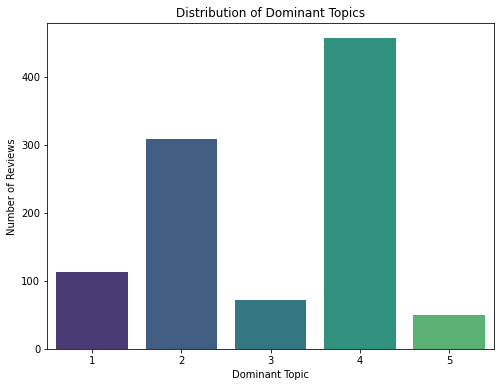

In [55]:
# Visualising the above
plt.figure(figsize=(8, 6))
sns.countplot(x='dominant_topic', data=mydata, palette=palette)
plt.title('Distribution of Dominant Topics')
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Reviews')
plt.show()

Most of the reviews (45.7%) seem to be of topic 4, and the least (just 4.9%) of topic 5. 

### 3.2 Sentiment distribution within each topic

In [57]:
sentiment_distribution_within_topic = mydata.groupby(['dominant_topic', 'sentiment_class']).size().unstack(fill_value=0)

In [58]:
# Normalize sentiment distribution within each topic to percentages
sentiment_distribution_within_topic_percentage = sentiment_distribution_within_topic.div(sentiment_distribution_within_topic.sum(axis=1), axis=0) * 100

print("Sentiment Distribution Within Each Topic:")
print(sentiment_distribution_within_topic_percentage)

Sentiment Distribution Within Each Topic:
sentiment_class   Negative    Neutral   Positive
dominant_topic                                  
1                30.088496  36.283186  33.628319
2                70.873786  26.213592   2.912621
3                61.111111  20.833333  18.055556
4                24.070022  24.507659  51.422319
5                55.102041  26.530612  18.367347


<Figure size 864x576 with 0 Axes>

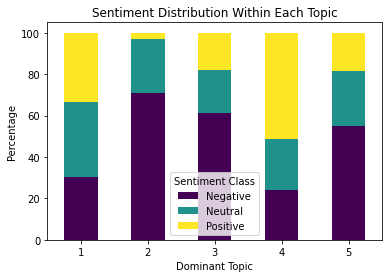

In [93]:
plt.figure(figsize=(12, 8))
sentiment_distribution_within_topic_percentage.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Sentiment Distribution Within Each Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Sentiment Class')
plt.show()

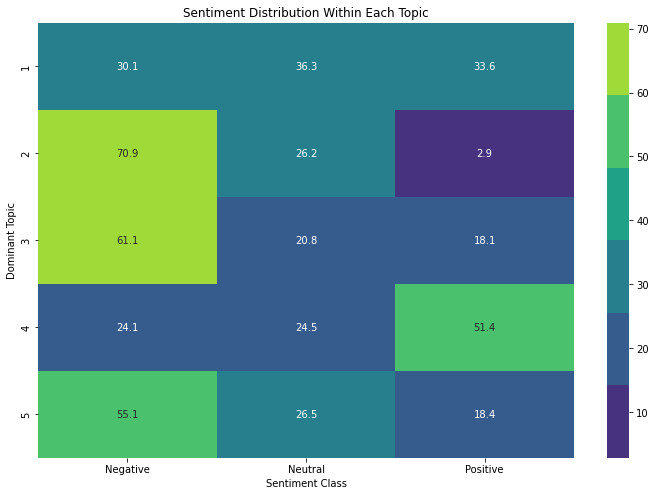

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution_within_topic_percentage, annot=True, cmap=palette, fmt=".1f")
plt.title('Sentiment Distribution Within Each Topic')
plt.xlabel('Sentiment Class')
plt.ylabel('Dominant Topic')
plt.show()

Observations:
- Clearly, a vast majority of the reviews about topic 2 are of negative sentiment with least being positive. For reviews about topics 3 and 5 as well, a majority of reviews are negative. 

- Reviews about topic 4 (which is the topic that a majority of the reviews are about, as we discovered before) are majorly positive.

- Reviews about topic 1 are nearly an even amount of positive, negative and neural in nature.

Moreover, further in-depth research into these topics can help provide valuable insights to inform business decisions and improvements. For example, if a dominant topic consistently relates to issues with customer service, consider implementing training programs or process improvements to address these concerns.